In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [3]:
dataset = pd.read_csv("winequality-red.csv")

In [4]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [8]:
dataset.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
dataset["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

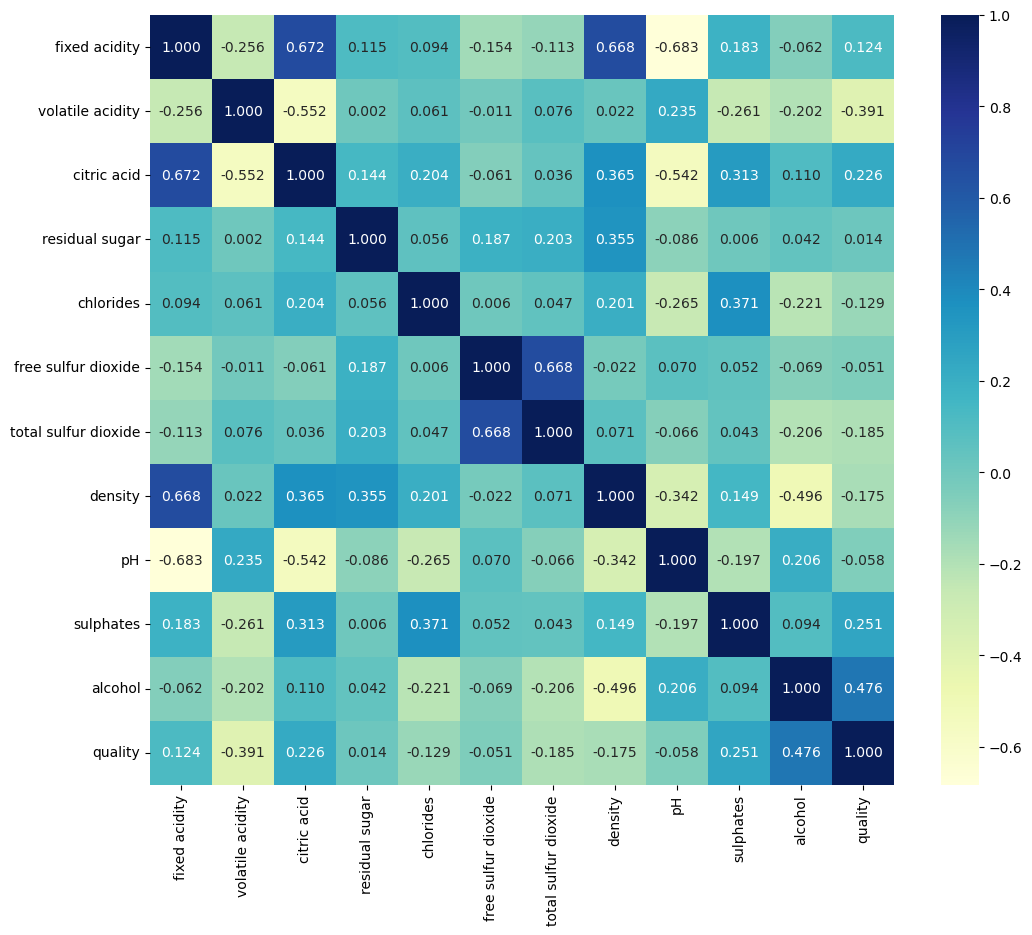

In [10]:
plt.figure(figsize = (12, 10))
sns.heatmap(dataset.corr(), annot = True, fmt = ".3f", cmap = "YlGnBu")
plt.show()

<Axes: xlabel='quality'>

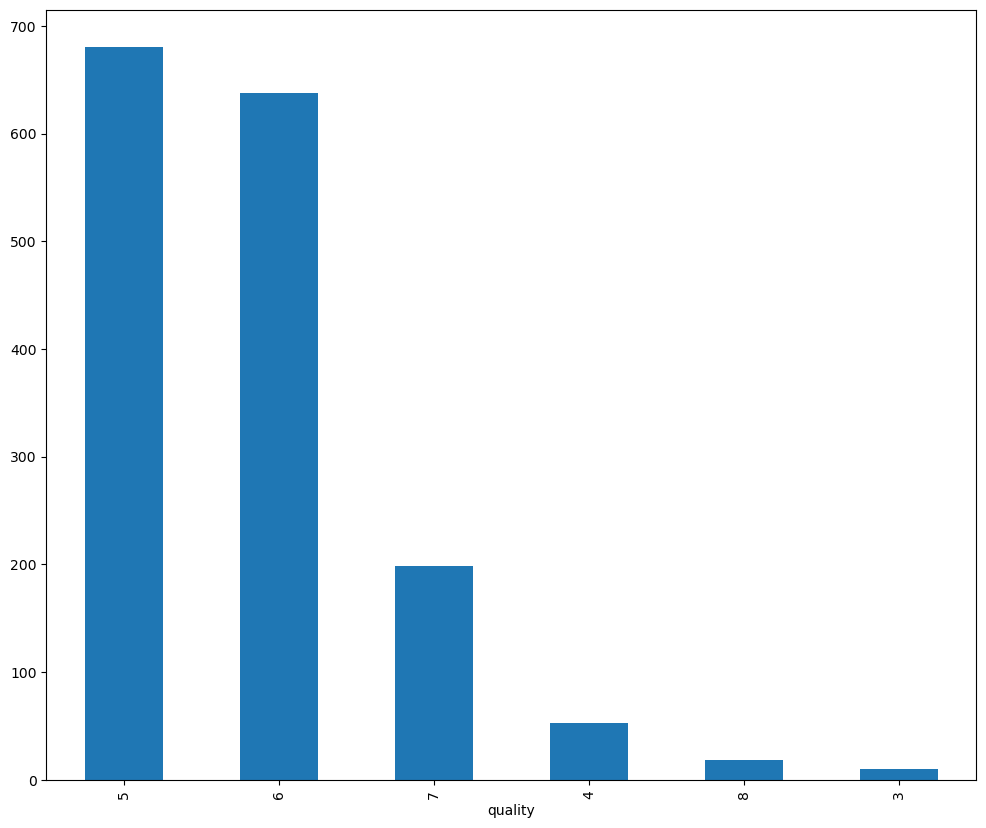

In [11]:
plt.figure(figsize = (12,10))
dataset["quality"].value_counts().plot.bar()

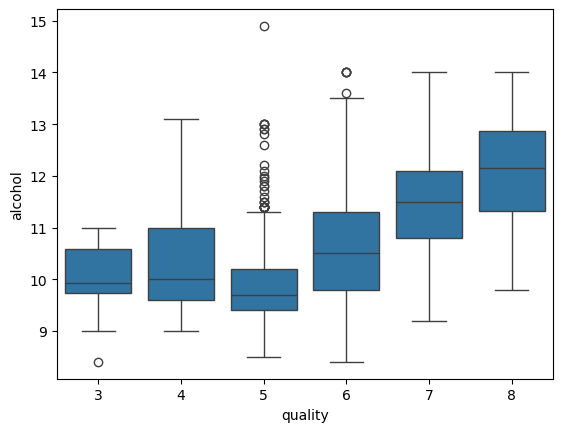

In [12]:
sns.boxplot(x = 'quality', y = 'alcohol', data = dataset)
plt.show()

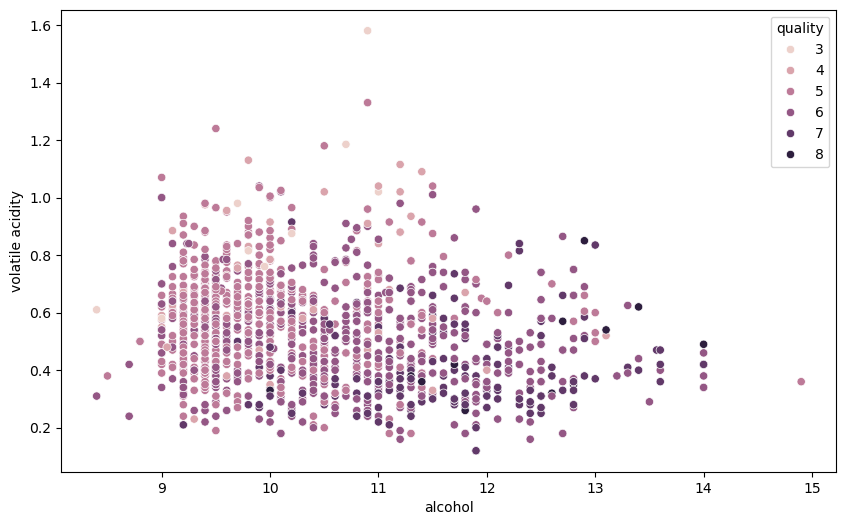

In [13]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'alcohol', y = 'volatile acidity', hue = 'quality', data = dataset)
plt.show()

In [14]:
dataset["quality_category"] = [1 if q >= 7 else 0 for q in dataset["quality"]]

In [15]:
dataset = dataset.drop(["quality"], axis = 1)

In [16]:
X = dataset.drop(["quality_category"], axis = 1)
Y = dataset["quality_category"]

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state =42)

In [18]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [19]:
print("Training accuracy: ", dtc.score(X_train, Y_train))
print("Testing accuracy: ", dtc.score(X_test, Y_test))

Training accuracy:  1.0
Training accuracy:  0.884375


In [20]:
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)

RandomForestClassifier()

In [21]:
print("Training accuracy: ", rfc.score(X_train, Y_train))
print("Testing accuracy: ", rfc.score(X_test, Y_test))

Training accuracy:  1.0
Training accuracy:  0.89375


In [32]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)
dt_scores = cross_val_score(dtc, X_train, Y_train, cv = skf, scoring = 'accuracy')

print("Decision Tree Cross-Validation Scores:", dt_scores)
print(f"Average Accuracy: {np.mean(dt_scores):.4f}")

Decision Tree Cross-Validation Scores: [0.859375   0.83984375 0.87109375 0.8125     0.85490196]
Average Accuracy: 0.8475


In [33]:
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = True)
rf_scores = cross_val_score(rfc, X_train, Y_train, cv = skf, scoring = 'accuracy')

print("Random Forest Cross-Validation Scores:", rf_scores)
print(f"Average Accuracy: {np.mean(rf_scores):.4f}")

Random Forest Cross-Validation Scores: [0.8828125  0.90234375 0.8984375  0.89453125 0.90588235]
Average Accuracy: 0.8968


C:\Users\siva\AppData\Local\Temp\ipykernel_900\391017824.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([dt_scores, rf_scores], labels=["Decision Tree", "Random Forest"])


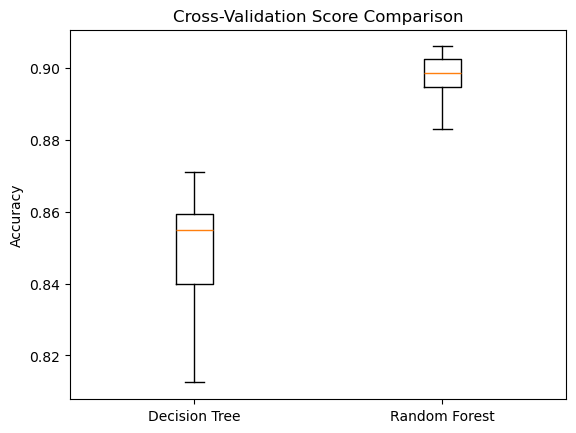

In [1]:
import matplotlib.pyplot as plt

dt_scores = [0.859375,   0.83984375, 0.87109375, 0.8125,     0.85490196]
rf_scores = [0.8828125,  0.90234375, 0.8984375,  0.89453125, 0.90588235]

plt.boxplot([dt_scores, rf_scores], labels=["Decision Tree", "Random Forest"])
plt.title("Cross-Validation Score Comparison")
plt.ylabel("Accuracy")
plt.show()
